In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.decomposition import PCA
import sklearn.datasets as datasets
from IPython.display import Image

<div class="alert alert-block alert-warning">

### Apply SVD on face images


</div>

# Read images into trian and test

In [3]:
data_dir = 'att_faces'

In [4]:
train_faces = []
test_faces = []
for i in range(1,41):
    current_dir = data_dir + '/s' +str(i)
    for j in range(1,8):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        train_faces.append(im)
    for j in range(8,11):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        test_faces.append(im)

In [5]:
len(train_faces)

280

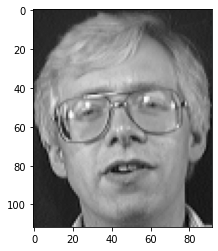

In [6]:
plt.imshow(train_faces[7],'gray')

In [7]:
train_faces[7].shape

(112, 92)

In [8]:
train_faces = np.array(train_faces)
test_faces = np.array(test_faces)

In [9]:
train_faces.shape

(280, 112, 92)

In [10]:
train_faces = train_faces.reshape(train_faces.shape[0],train_faces.shape[1]*train_faces.shape[2])
test_faces = test_faces.reshape(test_faces.shape[0],test_faces.shape[1]*test_faces.shape[2])

In [11]:
train_faces.shape

(280, 10304)

### Apply PCA on faces to obtain eigenvalues and eigenvectors

In [12]:
# Compute a PCA 
n_components = 250
pca = PCA(n_components=n_components, whiten=True).fit(train_faces)
 
# apply PCA transformation
X_train_pca = pca.transform(train_faces)
X_test_pca= pca.transform(test_faces)

In [13]:
X_train_pca.shape

(280, 250)

In [14]:
pca.components_.shape

(250, 10304)

In [15]:
eigenfaces = pca.components_.reshape(250,112,92)

In [16]:
np.dot(pca.components_[5],pca.components_[13])

-8.326672684688674e-17

In [17]:
eigenfaces.shape

(250, 112, 92)

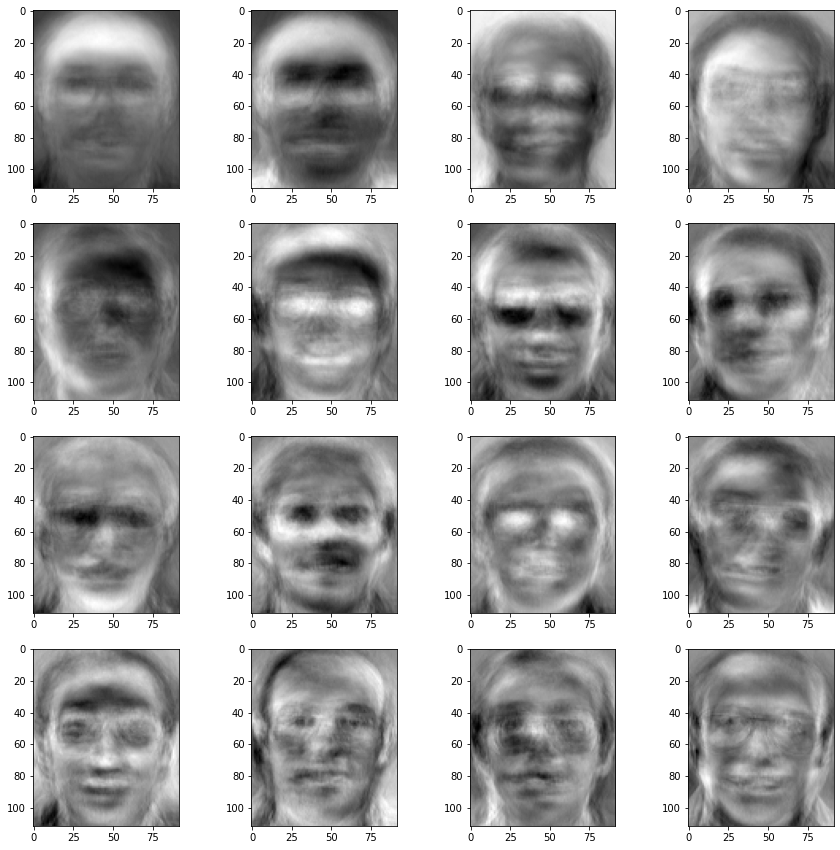

In [18]:
fix, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(eigenfaces[i*4 + j],'gray')

In [19]:
X_train1 = pca.inverse_transform(X_train_pca)

In [20]:
X_train_pca.shape

(280, 250)

In [21]:
X_train1.shape

(280, 10304)

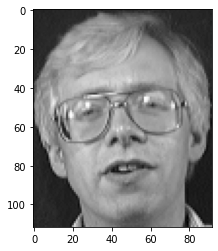

In [22]:
plt.imshow(X_train1[7].reshape(112,92),'gray')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Find the eigenvectors (eigenfaces) and eigenvalues with SVD for the above face dataset

</div>

In [23]:
from scipy.linalg import svd
u,s,v = np.linalg.svd(im, full_matrices=True, compute_uv=True)
u.shape
s.shape
v.shape
eigenvalue = s**2
#Calculating the eigenvectors
eigenvector1 = np.linalg.eig(im.dot(im.T))[1]
eigenvector2 = np.linalg.eig(im.T.dot(im))[1]

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1_1

- Apply KNN(1NN) on the original faces(not reduced ones) and calculate the accuracy for the test set.

- Apply KNN(1NN) on the reduced feature space(after PCA) and calculate the accuracy for the test set.

Compare the result of the two approaches.



</div>

<div class="alert alert-block alert-warning">

### Decision tree visualiztion and rules extraction


</div>

In [24]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [25]:
np.unique(y)

array([0, 1, 2])

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

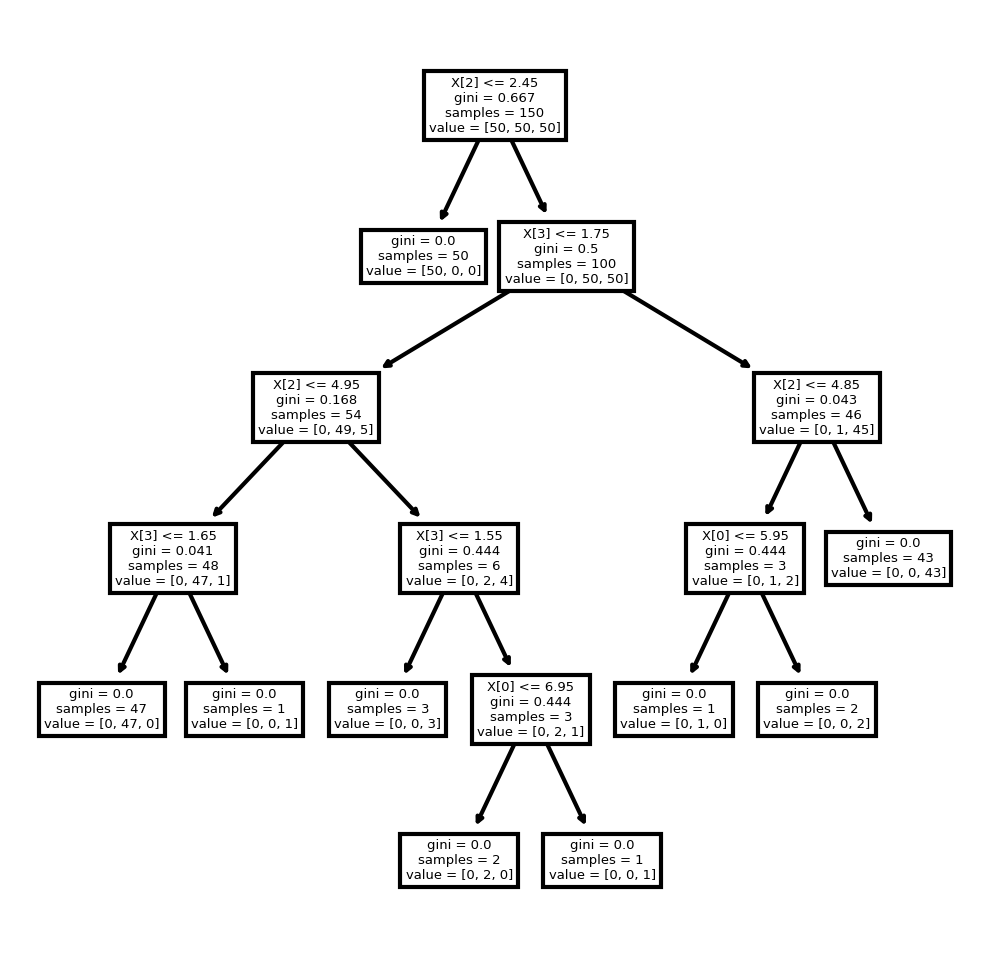

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree);
fig.savefig('imagename.png')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Find the two most important features according to the decision tree output.

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Train a decision tree based on the two most important features, and plot the decision boundary including data samples.

</div>

<div class="alert alert-block alert-warning">

### Bayesian Network


</div>

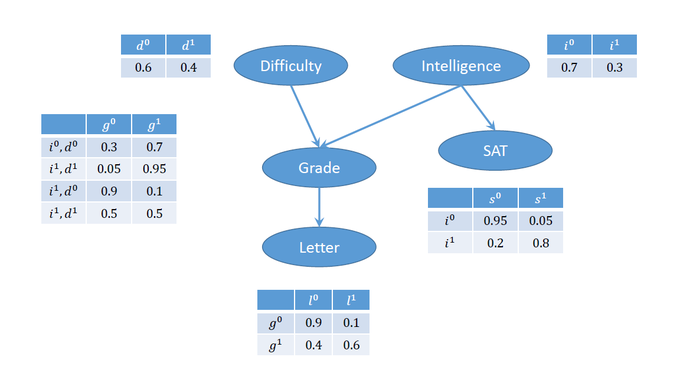

In [28]:
Image("Images/Student model.png")

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Difficulty and Intelligence
- Join probability of Difficulty and Intelligence given Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [1]:
#Creating the Bayesian network using pomegranate API
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution
student_model=BayesianModel([('Difficulty','Grade'),('Intelligence','Grade'),('Intelligence','SAT'),('Grade','Letter')])

In [2]:
cpd_difficulty=TabularCPD(variable='Difficulty', variable_card=2,values=[[0.6],[0.4]])
cpd_intelligence=TabularCPD(variable='Intelligence', variable_card=2,values=[[0.7],[0.3]])
cpd_grades=TabularCPD(variable='Grade', variable_card=2,values=[[0.3,0.05,0.9,0.5],[0.7,0.95,0.1,0.5]],
                      evidence=['Difficulty','Intelligence'],evidence_card=[2,2])
cpd_SAT=TabularCPD(variable='SAT',variable_card=2,values=[[0.95,0.2],[0.05,0.8]],evidence=['Intelligence'],
                   evidence_card=[2])
cpd_letter=TabularCPD(variable='Letter',variable_card=2,values=[[0.9,0.4],[0.1,0.6]],evidence=['Grade'],
                      evidence_card=[2])

In [3]:
student_model.add_cpds(cpd_difficulty,cpd_intelligence,cpd_grades,cpd_SAT,cpd_letter)
student_model.check_model()

True

In [36]:
student_model.get_independencies()

(Difficulty _|_ Intelligence, SAT)
(Difficulty _|_ Intelligence | SAT)
(Difficulty _|_ SAT | Intelligence)
(Difficulty _|_ Letter | Grade)
(Difficulty _|_ Letter | SAT, Grade)
(Difficulty _|_ SAT | Intelligence, Letter)
(Difficulty _|_ SAT, Letter | Intelligence, Grade)
(Difficulty _|_ Letter | Intelligence, SAT, Grade)
(Difficulty _|_ SAT | Intelligence, Letter, Grade)
(Grade _|_ SAT | Intelligence)
(Grade _|_ SAT | Difficulty, Intelligence)
(Grade _|_ SAT | Intelligence, Letter)
(Grade _|_ SAT | Difficulty, Intelligence, Letter)
(Intelligence _|_ Difficulty)
(Intelligence _|_ Difficulty | SAT)
(Intelligence _|_ Letter | Grade)
(Intelligence _|_ Letter | SAT, Grade)
(Intelligence _|_ Letter | Difficulty, Grade)
(Intelligence _|_ Letter | Difficulty, SAT, Grade)
(SAT _|_ Difficulty)
(SAT _|_ Difficulty, Letter, Grade | Intelligence)
(SAT _|_ Letter | Grade)
(SAT _|_ Letter, Grade | Difficulty, Intelligence)
(SAT _|_ Letter | Difficulty, Grade)
(SAT _|_ Difficulty, Grade | Intelligence,

In [45]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(student_model)
D_dist = infer.query(['Difficulty'])
print(D_dist)

Eliminating: Grade: 100%|██████████| 4/4 [00:00<00:00, 197.61it/s]

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.6000 |
+---------------+-------------------+
| Difficulty(1) |            0.4000 |
+---------------+-------------------+


In [46]:
infer = VariableElimination(student_model)
I_dist = infer.query(['Intelligence'])
print(I_dist)

Eliminating: Grade: 100%|██████████| 4/4 [00:00<00:00, 238.08it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.7000 |
+-----------------+---------------------+
| Intelligence(1) |              0.3000 |
+-----------------+---------------------+


In [51]:
jpd=D_dist*I_dist
print(jpd)

+---------------+-----------------+--------------------------------+
| Difficulty    | Intelligence    |   phi(Difficulty,Intelligence) |
+===============+=================+================================+
| Difficulty(0) | Intelligence(0) |                         0.4200 |
+---------------+-----------------+--------------------------------+
| Difficulty(0) | Intelligence(1) |                         0.1800 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(0) |                         0.2800 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(1) |                         0.1200 |
+---------------+-----------------+--------------------------------+


In [52]:
"""
From the above table, we will only be considering the last observation of the table, hence the 
joint Probablity distribution will be 0.12 
"""

'\nFrom the above table, we will only be considering the last observation of the table, hence the \njoint Probablity distribution will be 0.12 \n'

In [55]:
infer = VariableElimination(student_model)
D_dist_givenG = infer.query(['Difficulty'],evidence={'Grade':1})
print(D_dist_givenG)

Eliminating: Intelligence: 100%|██████████| 3/3 [00:00<00:00, 169.98it/s]

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.8409 |
+---------------+-------------------+
| Difficulty(1) |            0.1591 |
+---------------+-------------------+


In [56]:
infer = VariableElimination(student_model)
I_dist_givenG = infer.query(['Intelligence'],evidence={'Grade':1})
print(I_dist_givenG)

Eliminating: SAT: 100%|██████████| 3/3 [00:00<00:00, 200.31it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.5823 |
+-----------------+---------------------+
| Intelligence(1) |              0.4177 |
+-----------------+---------------------+


In [57]:
jpd_givenG=D_dist_givenG*I_dist_givenG
print(jpd_givenG)

+---------------+-----------------+--------------------------------+
| Difficulty    | Intelligence    |   phi(Difficulty,Intelligence) |
+===============+=================+================================+
| Difficulty(0) | Intelligence(0) |                         0.4896 |
+---------------+-----------------+--------------------------------+
| Difficulty(0) | Intelligence(1) |                         0.3512 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(0) |                         0.0927 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(1) |                         0.0665 |
+---------------+-----------------+--------------------------------+


In [58]:
"""
From the above table we will only consider the last obeservation, hence the value is 0.0665
"""

'\nFrom the above table we will only consider the last obeservation, hence the value is 0.0665\n'

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Grade and SAT
- Join probability of Grade and SAT given Intelligence

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [53]:
infer = VariableElimination(student_model)
G_dist = infer.query(['Grade'])
print(G_dist)

Eliminating: Intelligence: 100%|██████████| 4/4 [00:00<00:00, 257.67it/s]

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.4470 |
+----------+--------------+
| Grade(1) |       0.5530 |
+----------+--------------+


In [59]:
S_dist = infer.query(['SAT'])
print(S_dist)

Eliminating: Intelligence: 100%|██████████| 4/4 [00:00<00:00, 191.08it/s]

+--------+------------+
| SAT    |   phi(SAT) |
+========+============+
| SAT(0) |     0.7250 |
+--------+------------+
| SAT(1) |     0.2750 |
+--------+------------+


In [60]:
jpd=G_dist*S_dist
print(jpd)

+----------+--------+------------------+
| Grade    | SAT    |   phi(Grade,SAT) |
+==========+========+==================+
| Grade(0) | SAT(0) |           0.3241 |
+----------+--------+------------------+
| Grade(0) | SAT(1) |           0.1229 |
+----------+--------+------------------+
| Grade(1) | SAT(0) |           0.4009 |
+----------+--------+------------------+
| Grade(1) | SAT(1) |           0.1521 |
+----------+--------+------------------+


In [61]:
G_dist_givenI = infer.query(['Grade'],evidence={'Intelligence':1})
print(G_dist_givenI)

Eliminating: SAT: 100%|██████████| 3/3 [00:00<00:00, 336.14it/s]

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.2300 |
+----------+--------------+
| Grade(1) |       0.7700 |
+----------+--------------+


In [62]:
S_dist_givenI = infer.query(['SAT'],evidence={'Intelligence':1})
print(S_dist_givenI)

Eliminating: Grade: 100%|██████████| 3/3 [00:00<00:00, 401.93it/s]

+--------+------------+
| SAT    |   phi(SAT) |
+========+============+
| SAT(0) |     0.2000 |
+--------+------------+
| SAT(1) |     0.8000 |
+--------+------------+


In [63]:
jpd_givenI=G_dist_givenI*S_dist_givenI
print(jpd_givenI)

+----------+--------+------------------+
| Grade    | SAT    |   phi(Grade,SAT) |
+==========+========+==================+
| Grade(0) | SAT(0) |           0.0460 |
+----------+--------+------------------+
| Grade(0) | SAT(1) |           0.1840 |
+----------+--------+------------------+
| Grade(1) | SAT(0) |           0.1540 |
+----------+--------+------------------+
| Grade(1) | SAT(1) |           0.6160 |
+----------+--------+------------------+


In [64]:
"""
From the above table, we will only be considering the last observation of the table, hence the 
joint Probablity distribution will be 0.6160
"""

'\nFrom the above table, we will only be considering the last observation of the table, hence the \njoint Probablity distribution will be 0.6160\n'

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Letter and Difficulty
- Join probability of Letter and Difficulty Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [65]:
L_dist = infer.query(['Letter'])
print(L_dist)

Eliminating: Grade: 100%|██████████| 4/4 [00:00<00:00, 340.57it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.6235 |
+-----------+---------------+
| Letter(1) |        0.3765 |
+-----------+---------------+


In [66]:
jpd=L_dist*D_dist
print(jpd)

+-----------+---------------+--------------------------+
| Letter    | Difficulty    |   phi(Letter,Difficulty) |
+===========+===============+==========================+
| Letter(0) | Difficulty(0) |                   0.3741 |
+-----------+---------------+--------------------------+
| Letter(0) | Difficulty(1) |                   0.2494 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(0) |                   0.2259 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(1) |                   0.1506 |
+-----------+---------------+--------------------------+


In [67]:
L_dist_givenG = infer.query(['Letter'],evidence={'Grade':1})
print(L_dist_givenG)

Eliminating: Intelligence: 100%|██████████| 3/3 [00:00<00:00, 355.36it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.4000 |
+-----------+---------------+
| Letter(1) |        0.6000 |
+-----------+---------------+


In [68]:
jpdLD_givenG=L_dist_givenG*D_dist_givenG
print(jpdLD_givenG)

+-----------+---------------+--------------------------+
| Letter    | Difficulty    |   phi(Letter,Difficulty) |
+===========+===============+==========================+
| Letter(0) | Difficulty(0) |                   0.3363 |
+-----------+---------------+--------------------------+
| Letter(0) | Difficulty(1) |                   0.0637 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(0) |                   0.5045 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(1) |                   0.0955 |
+-----------+---------------+--------------------------+


In [69]:
"""
From the above table, we will only be considering the last observation of the table, hence the 
joint Probablity distribution will be 0.0955
"""

'\nFrom the above table, we will only be considering the last observation of the table, hence the \njoint Probablity distribution will be 0.0955\n'